# Group Comparisons ---
We will learn how to make intelligent comparisons between groups (using business case scenarios) <br>
In the beginning, we will start small by observing one group alone and performing descriptive statistics, draw plots that capture its essence. Moving, we can reason between the sample with two groups and conlude with two statistical significance tests: the t-test and Mann-Whitney U-test.

### About Data --
This data records measurements of 1,034 professional basketball players, including their height, weight and age at the time of measurement.<br>
<b>The collective 1034 people are called population, which in the world of statistics means any set of similar itmes that are being studied to answer a particular question.</b>

In [2]:
import pandas as pd
df = pd.read_csv('mlb.csv')
print(df.head())
print(df.tail())
print(df.shape) #One row for each person recorded and one column for each fact measured about the person.

              name team       position  height  weight    age
0    Adam_Donachie  BAL        Catcher      74   180.0  22.99
1        Paul_Bako  BAL        Catcher      74   215.0  34.69
2  Ramon_Hernandez  BAL        Catcher      72   210.0  30.78
3     Kevin_Millar  BAL  First_Baseman      72   210.0  35.43
4      Chris_Gomez  BAL  First_Baseman      73   188.0  35.71
                name team        position  height  weight    age
1029   Brad_Thompson  STL  Relief_Pitcher      73   190.0  25.08
1030   Tyler_Johnson  STL  Relief_Pitcher      74   180.0  25.73
1031  Chris_Narveson  STL  Relief_Pitcher      75   205.0  25.19
1032   Randy_Keisler  STL  Relief_Pitcher      75   190.0  31.01
1033     Josh_Kinney  STL  Relief_Pitcher      73   195.0  27.92
(1034, 6)


In [3]:
# Doing exploratory analysis everytime we get a new data set is useful. .describe()
print(df.describe())

            height       weight          age
count  1034.000000  1033.000000  1034.000000
mean     73.697292   201.689255    28.736712
std       2.305818    20.991491     4.320310
min      67.000000   150.000000    20.900000
25%      72.000000   187.000000    25.440000
50%      74.000000   200.000000    27.925000
75%      75.000000   215.000000    31.232500
max      83.000000   290.000000    48.520000


In [4]:
df.loc[df['weight'].isna(), :]

,name,team,position,height,weight,age
640,Kirk_Saarloos,CIN,Starting_Pitcher,72,NaN,27.77


## Summary Statistics -
Plotting the data early and often is also a good idea in any data-analysis effort. We'll create a boxplot with the following code.

([<matplotlib.axis.XTick at 0x234a6b13380>], [Text(1, 0, 'Full Population')])

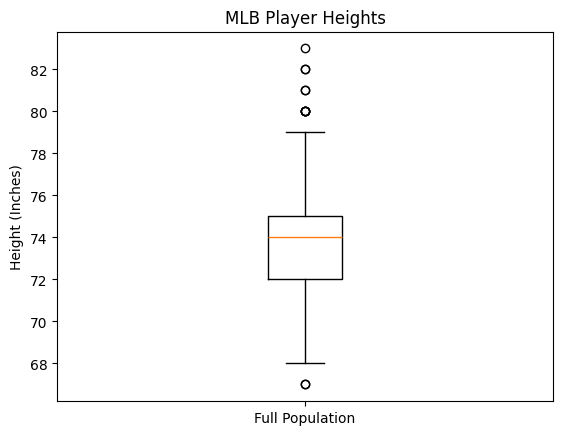

In [5]:
# Plotting data early is often a good idea in any data-analysis effort. We'll create a boxplot
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.boxplot([df['height']])
ax1.set_ylabel("Height (Inches)")
plt.title("MLB Player Heights")
plt.xticks([1], ['Full Population'])

<Axes: ylabel='height'>

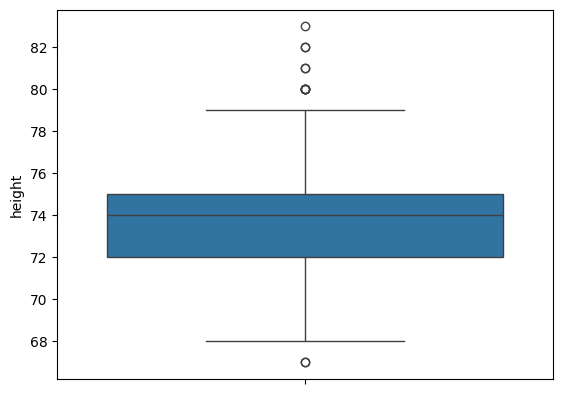

In [6]:
import seaborn as sns
sns.boxplot(data = df, y = df['height']) #Comeback to it later

# Random Samples 
## Data Sampling

So in an instance when we want to study a population, but we do not have the access to the whole population. We study a small part of it or <i>sample</i> instead. <br>
<b>For Example</b>: Medical Researchers may want to create a drug that can cure a disease for all women over 50 years old. Researchers may not have a way to contact every 50 Year old women in the world, so instead they recruit a sample of that full population, maybe a few 100 people and study the effect of their drug on this sample. <br>
The <b>hope</b> is that the sample resembles the full population, inferring the same affects on the whole population. <br>
Recruiting a sample is a delicate task and must be done carefully, In an instance where all participants are at an Olympic Training facility, the sample will contain people who are healthier than average, resulting in a drug that may work for healthy people but not for everyone.<br>
<i>The best way to collect a sample that resembles the full population is to take random sample.

### Pandas.DataFrame.sample
Return a random sample of items from an axis of object. <br>
n = int [ Number of items from axis to return ] <br>
<b><i>NOTE:</i></b> In the world of statistics, choosing <i>n = 30</i> is a common convention. When we choose samples that have <b>atleast size 30</b>.

In [7]:
sample1 = df.sample(n = 30, random_state = 8675309)
sample2= df.sample(n =  30, random_state = 1729)
# Manual sample -  
sample3 = [71, 72, 73, 74, 74, 76, 75, 75, 75, 76, 75, 77, 76, 75, 77, 76, 75, 76, 76, 75, 75, 81, 77, 75, 77, 75, 77, 77, 75, 75]

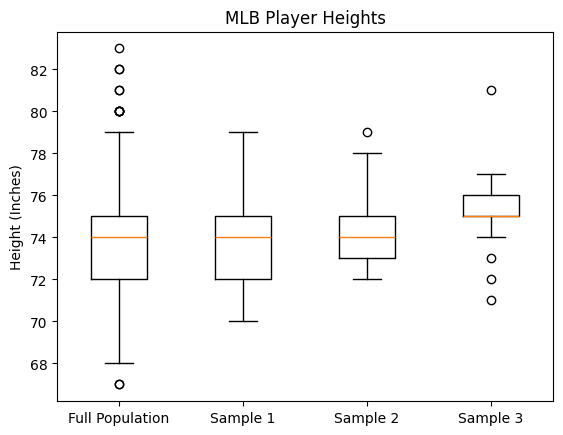

In [8]:
import numpy as np
fig1, ax1 = plt.subplots()
ax1.boxplot([df['height'], sample1['height'], sample2['height'], np.array(sample3)])
ax1.set_ylabel('Height (Inches)')
plt.title('MLB Player Heights')
plt.xticks([1,2,3,4], ['Full Population', 'Sample 1', 'Sample 2', 'Sample 3'])
plt.show()


<b>Note</b>: When we take large enough random samples from a population, the samples should resemble the population.

In [9]:
print(np.mean(sample1['height']))
print(np.mean(sample2['height']))
print(np.mean(sample3))
#Mean of whole population: 73.7

73.8
74.36666666666666
75.43333333333334


The means are relatively close to the mean height of full population. In this context, height of the full population has a special name; its called population's <i>expected value</i>. <br>
We expect that the mean height of our sample will be about the same as the population's expected value for height, 73.7. The mean of our two random samples indeed come close to our expected value. When we look at the boxplot of Sample 3, we can clearly see that it doesn't resemble to the other three box plots as much they resemble each other. But on the other hand it doesn't look very different from the population or other samples that we can immediately certain that it isn't a random sample from our population. We need to learn more before we can feel certain about whether sample3 is a random draw from our population or whether it comes from some other population. <br>
The vague and impressionistic language to talk about samples: <i>they resemble each other</i> or that their means are <i>relatively close</i>. <br>
But if we really want to make concrete-evidence based decisions, we need precision. <br>
Exploring quantitative statistical methods that have been developed for reasoning about the differences between groups, including some tests that help us decide whether two groups come from the same population.

# Differences Between Sample Data --
How big of a difference between sample means would make it implausible that two samples come from the same population? <br>
To understand this we must understand the <b><i>size differences</i></b> we should expect between random samples from our population. Right now we have looked at only <b>two random samples</b> from our population. Instead of trying to generalize based on only two samples, lets look at a large collection of samples and see how much they tend to differ from one another. <br>
This will help us understand which variations are plausible and which variations are implausible. <br>
2,000 sample means and their differences --

In [10]:
alldifferences = []
for i in range(1000):
    newsample1 = df.sample(n= 30, random_state= i*2)
    newsample2 = df.sample(n= 30, random_state= i*2+1)
    alldifferences.append(newsample1['height'].mean() - newsample2['height'].mean())

print(alldifferences[0:10])

[np.float64(0.8333333333333286), np.float64(-0.30000000000001137), np.float64(-0.10000000000000853), np.float64(-0.1666666666666572), np.float64(0.06666666666667709), np.float64(-0.9666666666666686), np.float64(0.7999999999999972), np.float64(0.9333333333333371), np.float64(-0.5333333333333314), np.float64(-0.20000000000000284)]


### Observation -
The first two samples are abot 0.83 inches apart, second pair of samples has means that are about 0.3 inches apart, sixth pair is -0.97 inches apart and the fifth one is nearly identical 0.07 inches. Looking at these 10 numbers, we can infer that 0.6 is not an implausible difference between two samples from our population since several of our first 10 differences are greater in magnitude than 0.6. However, none of the differences we've seen so far are greater than 1 inch in Magnitude, so 1.6 inches is starting to seem more implausible. <br>

A clearer, visual representation of our 1,000 differences by drawing a plot of alldifferences list:

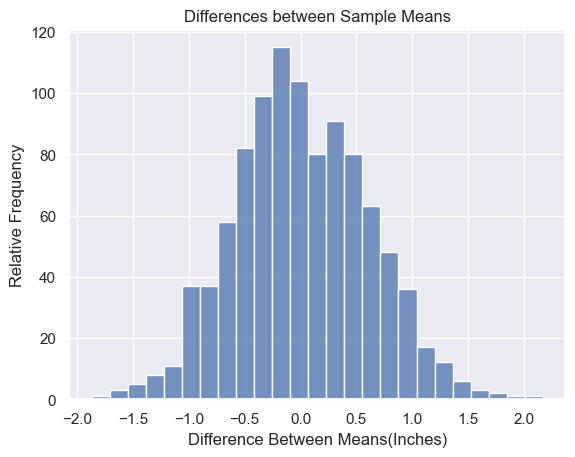

In [11]:
import seaborn as sns
sns.set()
ax= sns.histplot(alldifferences).set_title("Differences between Sample Means")
plt.xlabel('Difference Between Means(Inches)')
plt.ylabel('Relative Frequency')
plt.show()

# 1/12/25 - Distplot is deprecated and will be removed.

<b>On the basis of evidence, It is highly unlikely that sample3 is random sample from our baseball player population. Moreover, we can find out how implausible it is by checking exactly how many of our differences have magnitude greater than or equal to 1.6 inches</b>

In [12]:
largedifferences = [diff for diff in alldifferences if abs(diff)>=1.6]
print(len(largedifferences))

8


## About the Histogram --
In this histogram, each bar represents a relative frequency; how likely each observation is compared to other observations. A high bar at value 0 indicates a really high number of differences in our alldifferences list that are very close to <b>0</b>. A much lower bar appears at <i>x=1</i>. Indicating very few cases in which difference between the sample means is about 1. It is rare for our random samples to be very different from each other, because they're samples from the same population and we expect their means to be roughly the same. <br>
The shape that bars make (if outlined) is a bell shape. The curve that this bell approximates is a <i>bell curve</i>. <br>
Approximate bell curves are found in many situations, one powerful theoretical result in statistics is called the <i>central limit theorem</i>, and it states that under a certain set of common conditions, differences between means of samples will be distribued in a shape thats approximately a bell curve.

# p-value
In the snippet <i>largedifferences</i>, A list contains all elements of alldifferences with magnitude greater than or equal to 1.6. We find out that there are only 8 elements, meaning that random samples from the population have means that differ by 1.6 or more only about 8 in 1000, 0.8% of the time. This probability is oftenly called <i>p-value</i> where p is short for <b><i>probability</i></b>. <br>
If we assume that sample3 is a random sample from our population, we have to believe that this rare difference, something whose extremity occurs less than 1 percent of the time, has happened naturally. The low likelihood of this event may convince us to reject the idea that sample3 comes from the same population as sample1. <br>
<i>in other words</i>, The low p-value causes us to reject the notion that these two groups come from the same population. The lower the <i>p-value</i>, the more confident we feel about rejecting the notion that the groups come from the same population, because low <i>p-values</i> require us to believe in more and more unlikely coincidences.

In [13]:
smalldifferences = [diff for diff in alldifferences if abs(diff)>=0.6]
print(len(largeddifferences))

NameError: name 'largeddifferences' is not defined

In <i>smalldifferences</i>, A list containing every element that has a magnitude greater than or equal to 0.6 inches. We can see that differences of such magnitude occur 31.4 percent of the time. In that case, we would say that our <i>p-value</i> is 0.314. If sample1 and sample2 come from the same population, we would have to believe that this size of difference which occurs 31 percent of the time, occurred in our case. It's not hard to believe that somethign with 31 percent probability occurred, so we conclude that the difference between sample1 and sample2 is plausible. <br>
the <i>p-values</i> we have calculated here have led us to accept the notion that sample1 and sample2 come from the same population and to reject the notion that sample1 and sample3 come from the same population. <br>
That is the importance of <b><i>p-value</i></b>, the size of p-value is very important in our efforts to compare groups.

# Performing Hypothesis Testing --
We have outlined all the ingredients necessary for a method of statistical reasoning called <i>hypothesis testing</i>. We're trying to determine whether sample 3 is a random sample from the same population as sample1. <b>In scientific terms we can say that we are considering two different hypotheses: <br>
1. <b>Hypothesis 0</b>: <i>sample1 and sample3 are random samples from the same population.</i>
2. <b>Hypothesis 1</b>: <i>sample1 and sample3 are not random samples from the same population.</i> <br>
In common statistical parlance, we call Hypothesis 0 the <i>null hypothesis</i> and we call Hypothesis 1 the <i>alternative hypothesis</i>. <br>
<b>The null hypothesis</b> asserts that both samples are randomly drawn from one population with just one mean and one standard deviation. The alternative hypothesis asserts that the samples are randomly drawn from two totally different populations, each with its own mean, own standard deviation and all of its own unique characterstics. The way we choose between these two hypotheses is by following the same reasoning we followed earlier: <br>
1. Assume that Hypothesis 0, the null hypothesis, is <b>true</b>
2. Find how likely we are to observe sample means that differ by as much as our observed sample means, Assuming that Hypothesis 0 is true. The likelihood of this occuring is called the <i>p-value</i>
3. If the p-value is <b>small enough</b>, we reject Hypothesis 0 and we're therefore willing to accept Hypothesis 1. <br>

Step-3 is stated quite vaguely, <b>'small enough'</b>: How does one calculate or justify the p-value to be small enough and discard the <i>null hypothesis</i>? The reason for this vagueness is that there is no mathematically dictated choice for how small the p-value needs to be. We can determine the range of p-value which determines if we should reject Hypothesis 0. The <i>p-value</i> size that we believe justifies rejecting Hypothesis 0 is known as <i>significance level</i>. <br>
<b>Note</b>: The most common significance level used in empirical research is 5 percent, meaning that we consider the rejection of the null hypothesis justified if <i>p</i> < 0.05. In this case of sample1 and sample3, we can justify rejecting Hypothesis 0 at a significance level as low as 1 percent because <i>p</i><0.01. When we find a p-value that's less than our chosen significance level, we say that the difference between our groups is <i>statistically significant</i>.<br>
<b><i>Recommended Practice</i></b> is to choose the significance level that we want to use before doing any calculations; that way we can avoid the temptation to choose a significance level that confirms whichever hypothesis we want to be confirmed.

# The t-Test
We don't have to go through the rigorous process of calculatingg means, plotting histogram and calculating p-values everytime we want to do hypothesis testing. Statisticians have developed a relatively easier test that can help us determine if two groups come from the population, it's called <b><i>t-test</i></b>. <br>

We import the <b>scipy.stats</b> module. The SciPy package that this module is a part of is a popular Python Library that includes amonth many other things, many statistical tests that could be useful as you get more advanced in statistics and data science. <br>
After importing, we use its ttest_ind() command to check for differences between our samples.


In [15]:
import scipy.stats
scipy.stats.ttest_ind(sample1['height'], sample2['height'])

TtestResult(statistic=np.float64(-1.0839563860213952), pvalue=np.float64(0.2828695892305152), df=np.float64(58.0))

Here we get a relatively high <i>p-value</i>. About 28.3%, which is significantly higher than our threshold. (0.05 / 5%). This p-value calculation is mathematically exact. The high p-value indicates that it is plausible and belongs from the same population. Therefore, we choose  not to reject our <i>null hypothesis</i> and we accept (<b>until any other evidence convinces us otherwise</b>) that sample1 and sample2 come from the same population.

In [16]:
scipy.stats.ttest_ind(sample1['height'], sample3) #The p-value is very low. 0.0029 < 0.05

TtestResult(statistic=np.float64(-3.108694797644094), pvalue=np.float64(0.002910554741439718), df=np.float64(58.0))

# Interpretation -
The p-value of sample1 and sample3 is less than 0.05 which justifies rejecting the null hypothesis that sample1 and sample3 come from the same population. <br>
<b> More:</b> There are several kinds of t-tests, as well as hypothesis tests besides the t-test. The ttest command we have used so far has an _ind suffix. <br>
<i><b>_ind</b></i>: It indicates that it's meant to be used for independent samples. Here <i>independent</i> means just what we would expect: no meaningful, consistent relationship exists between the individuals in one sample and individuals in the other -- The sample consists different people who were randomly selected. <br>
<i><b>_rel</b></i>: (Related) -- scipy.stats-ttest_rel, which performs another type of t-test that is mathematically a little different from ttest_in. The ttest_rel command would be appropriate when observations in different samples have a meaningful relationship to each other -- Example : Two different exam scores for the same student or two medical test results for the same patient.
<i><b>welch's t-test</b></i>:  Designed for comparing samples but we don't assume that the samples have equal variance. [ In terms of python, equal_var = False to the t-test command ] <br>
The <i>t-test</i> is a <b><i>parametric test</i></b>, which means it relies on assumptions about the distribution of the datain our population. The t-test relies on several assumptions, like - <br>
Groups being compared should have sample means that follow a bell-curve; second the variances of the groups being compared should be identical and third, that two groups are independent of each other. If these assumptions are not met, the t-test might not be fully accurate, though its rarely too far from the truth even if the assumptions are not met. <br>

In some cases cases, we'd prefer to perform these hypothesis testing with a test that didn't make these strong assumptions that may not be true. If so, we can rely on a body of knowledge called <i>non-parametric statistics</i>, which provides tools for hypothesis testing and other statistical reasoning that make fewer assumptions about the distribution of our data (<i>for example</i>: we don't need to work with populations whose sample means follow bell curves). One of the hypothesis test from non-parmateric staistics is called the <i><b>Mann-Whitney U test</b></i> which can also be done in python! (Through Sci.Py, yet again)


In [17]:
scipy.stats.mannwhitneyu(sample1['height'], sample2['height'])

MannwhitneyuResult(statistic=np.float64(392.0), pvalue=np.float64(0.38913738408151577))

In order to have a deep understanding of the various kinds of hypothesis tests and exactly when to use them, one needs to read some advanced theoretical statistics textbooks. <br>

# Nuances of Hypothesis Testing --
Hypothesis Testing using a <i>null hypothesis</i> and a <i>t-test</i> is common enough to be called <b>popular</b>, but it's not as beloved as most popular things are. <br>
In general, students dislike it because its not intuitive to most people, requires some kind of tortutred reasoning to understand. Teachers dislike it because their students dislike it and struggle to learn it. Many methodological researchers dislike it because it's really at all levels for people to misunderstand and misinterpret <i>t-tests</i>, <i>p-value</i> and hypothesis tests in general. <br>

Most negative feelings towards hypothesis testing are the result of misunderstanding. Researchers misunderstand some nuances of hypothesis testing and misuse it and then mistakes in research result. which methodological sticklers resent. These misunderstandings are common even among professionals. <br>

## Important Nuances -

* <b><i>p-value</i></b> tells you the likelihood of observing data, after assuming the <i>null hypothesis</i> to be <i>true</i>. We might confuse the p-value for the likelihood of the hypothesis to be true. But the important point to note is that, p-value should not be directly interpreted as a probability of hypothesis being true. <br>
Practically : When we see the p-value for comparing the heights of sample1 and sample3  is <i>p= 0.008</i>. We can't say "<i><b>These samples have only a 0.8 percent probability of coming from the same population</b></i>" nor we can say, "<i><b>The null hypothesis has a 0.8 percent probability of being true</b></i>". <b>We can only say</b>, "<i>If the null hypothesis is <b>True</b>, something with 0.8 percent probability occurred</i>". This enables us to decide whether to reject the null hypothesis, but it doesn't enable us to say exactly how likely either hypothesis is to be true. This enables us to decide whether to reject the null hypothesis, but it doesn't enable us to say exactly how likely either hypothesis is to be true. <br>

* Another nuance is the difference between accepting a hypothesis and failing to reject it. Hypothesis testing only has two possible outcomes: <i>either we reject a null hypothesis, or we decide not to reject the null hypothesis</i>. <b>Failing to reject something is not quite the same as wholeheartedly accepting it</b>, and just because a p-value is not below a significance threshold doesnt mean that two groups are certainly the same. In other words, just because one t-test fails to lead a rejection of null hypothesis does not mean that the null hypothesis is certainly true. Similarly, Just because one p-value seems to justify a rejection of a null hypothesis does not mean that the null hypothesis is certainly false. <br>

* This is especially ture when we have limited data; difficult and noisy measurements or a reason to doubt our measurements. Hypothesis testing does not let us take uncertain data and have perfect certainty about hypotheses. Rather, it provides one piece of evidence that we have to understand properly and then weigh together with great deal of other evidence.

~ According to Anna Karenina principle > Leo Tolstoy wrote that "<i>all happy families are alike; each unhappy family is unhappy in its own way</i>". <br>
Similarly, <b>Statistics has an analogous principle:</b><i>all acceptances of the null hypothesis are alike</i><b>but each rejection of the null hypothesis happens for a different reason.</b> <br>
The null hypothesis states that two samples are random draws from the same population. If we reject the null hypothesis, the following things can be true: our two samples could be random draws from different populations or both could be from the same population but not randomly selected, or a source of sampling bias could be present, or blind luck might be occuring. <br>
Therefore, <i>just because we are confident about rejecting the null hypothesis doesn't mean we can be confident about which part of the null hypothesis is incorrect</i> As empirical researchers like to say, "Further research is needed".

* Another nuance that needs attention is the difference between <i>statistical significance</i> and <i>practical significance</i>. It's possible for one sample of athletes to have mean height 73.11 and another sample of athletes to have mean height 73.12, and for these two means to have a statistically significant difference according to a t-test. We can justifiably conclude that these two groups are not random samples from the same population and treat them differently because of their different mean height. However, even if this difference of 0.01 inches is statistically significant, its not clear that this difference has practical significance. <br>
Members of these two groups should be able to wear the same clothes, sit on the same seats on airplanes and reach the same high cupboards (on average). We have no reason to suppose that one group would be better than the other group at baseball in any practically important sense. Therefore, In this case we might wish to ignore the results of a <i>t-test</i>, since even though a <b>statistically detectable difference</b> exists, it's not a difference that has any practical consequence. Practical significance is always an important thing to consider during the process of hypothesis testing. <br>

Time to look at a practical business example --